In [77]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [78]:
stock = 'aapl'

In [79]:
start = pd.to_datetime(['2019-01-01']).astype(int)[0]//10**9
end = pd.to_datetime(['2022-08-05']).astype(int)[0]//10**9
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [80]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168350,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366508,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200


In [81]:
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

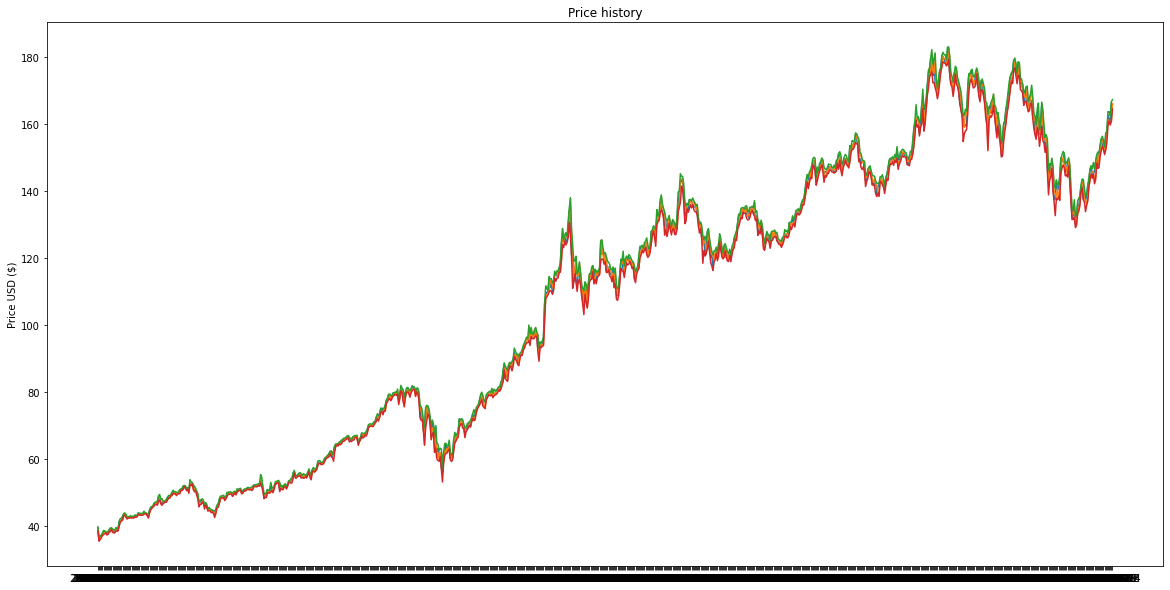

In [82]:
plt.figure(figsize=(20,10))
plt.title('Price history')
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.plot(df['High'])
plt.plot(df['Low'])

plt.ylabel('Price USD ($)')

plt.show()

In [83]:
df.drop(['Volume', 'Adj Close'],axis=1, inplace=True)

In [84]:
df.head(5)

,Open,High,Low,Close
Date,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000
2019-01-03,35.994999,36.430000,35.500000,35.547501
2019-01-04,36.132500,37.137501,35.950001,37.064999
2019-01-07,37.174999,37.207500,36.474998,36.982498
2019-01-08,37.389999,37.955002,37.130001,37.687500


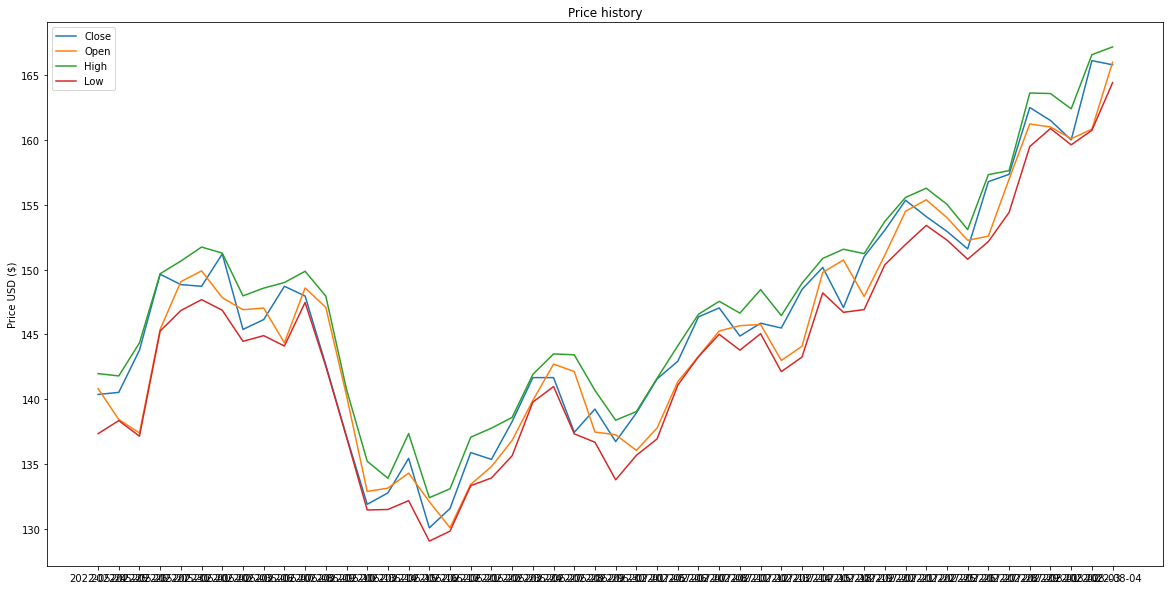

In [85]:
plt.figure(figsize=(20,10))
plt.title('Price history')
plt.plot(df['Close'][-50:], label='Close')
plt.plot(df['Open'][-50:], label='Open')
plt.plot(df['High'][-50:], label='High')
plt.plot(df['Low'][-50:], label='Low')

plt.ylabel('Price USD ($)')
plt.legend()
plt.show()

# Maximum daily

In [86]:
df['d_max_h'] = 0

In [87]:
for i in range(len(df['High'])-1):
    df.iloc[i+1, 4] = df.iloc[i, 1]
print(df.head(5))
print(df.tail(5))

                 Open       High        Low      Close    d_max_h
Date                                                             
2019-01-02  38.722500  39.712502  38.557499  39.480000   0.000000
2019-01-03  35.994999  36.430000  35.500000  35.547501  39.712502
2019-01-04  36.132500  37.137501  35.950001  37.064999  36.430000
2019-01-07  37.174999  37.207500  36.474998  36.982498  37.137501
2019-01-08  37.389999  37.955002  37.130001  37.687500  37.207500
                  Open        High         Low       Close     d_max_h
Date                                                                  
2022-07-29  161.240005  163.630005  159.500000  162.509995  157.639999
2022-08-01  161.009995  163.589996  160.889999  161.509995  163.630005
2022-08-02  160.100006  162.410004  159.630005  160.009995  163.589996
2022-08-03  160.839996  166.589996  160.750000  166.130005  162.410004
2022-08-04  166.009995  167.190002  164.429993  165.809998  166.589996


# Minimum daily

In [88]:
df['d_min'] = 0

In [89]:
for i in range(len(df['Low'])-1):
    df.iloc[i+1, 5] = df.iloc[i, 2]
print(df.head(5))
print(df.tail(5))

                 Open       High        Low      Close    d_max_h      d_min
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000   0.000000   0.000000
2019-01-03  35.994999  36.430000  35.500000  35.547501  39.712502  38.557499
2019-01-04  36.132500  37.137501  35.950001  37.064999  36.430000  35.500000
2019-01-07  37.174999  37.207500  36.474998  36.982498  37.137501  35.950001
2019-01-08  37.389999  37.955002  37.130001  37.687500  37.207500  36.474998
                  Open        High         Low       Close     d_max_h  \
Date                                                                     
2022-07-29  161.240005  163.630005  159.500000  162.509995  157.639999   
2022-08-01  161.009995  163.589996  160.889999  161.509995  163.630005   
2022-08-02  160.100006  162.410004  159.630005  160.009995  163.589996   
2022-08-03  160.839996  166.589996  160.750000  166.130005  162.410004   
2022-08-04  166.0

# Maximum weekly

In [90]:
df['w_max_h'] = 0

In [91]:
df.iloc[7-7:7, 1].max()

39.712502

In [92]:
for i in range(7, len(df['High'])):
    if i != len(df['High']):
        df.iloc[i, 6] = df.iloc[i-7:i, 1].max()
    else:
        df.iloc[i, 6] = df.iloc[i-7:i, 1].max()
        break
    
print(df.head(15))
print(df.tail(5))

                 Open       High        Low      Close    d_max_h      d_min  \
Date                                                                           
2019-01-02  38.722500  39.712502  38.557499  39.480000   0.000000   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501  39.712502  38.557499   
2019-01-04  36.132500  37.137501  35.950001  37.064999  36.430000  35.500000   
2019-01-07  37.174999  37.207500  36.474998  36.982498  37.137501  35.950001   
2019-01-08  37.389999  37.955002  37.130001  37.687500  37.207500  36.474998   
2019-01-09  37.822498  38.632500  37.407501  38.327499  37.955002  37.130001   
2019-01-10  38.125000  38.492500  37.715000  38.450001  38.632500  37.407501   
2019-01-11  38.220001  38.424999  37.877499  38.072498  38.492500  37.715000   
2019-01-14  37.712502  37.817501  37.305000  37.500000  38.424999  37.877499   
2019-01-15  37.567501  38.347500  37.512501  38.267502  37.817501  37.305000   
2019-01-16  38.270000  38.970001  38.250

# Minimum weekly

In [93]:
df['w_min'] = 0

In [94]:
for i in range(7, len(df['Low'])):
    if i != len(df['Low']):
        df.iloc[i, 7] = df.iloc[i-7:i, 1].min()
    else:
        df.iloc[i, 7] = df.iloc[i-7:i, 1].min()
        break
    
print(df.head(15))
print(df.tail(5))

                 Open       High        Low      Close    d_max_h      d_min  \
Date                                                                           
2019-01-02  38.722500  39.712502  38.557499  39.480000   0.000000   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501  39.712502  38.557499   
2019-01-04  36.132500  37.137501  35.950001  37.064999  36.430000  35.500000   
2019-01-07  37.174999  37.207500  36.474998  36.982498  37.137501  35.950001   
2019-01-08  37.389999  37.955002  37.130001  37.687500  37.207500  36.474998   
2019-01-09  37.822498  38.632500  37.407501  38.327499  37.955002  37.130001   
2019-01-10  38.125000  38.492500  37.715000  38.450001  38.632500  37.407501   
2019-01-11  38.220001  38.424999  37.877499  38.072498  38.492500  37.715000   
2019-01-14  37.712502  37.817501  37.305000  37.500000  38.424999  37.877499   
2019-01-15  37.567501  38.347500  37.512501  38.267502  37.817501  37.305000   
2019-01-16  38.270000  38.970001  38.250

# Maximum montly

In [95]:
df['m_max_h'] = 0

In [96]:
for i in range(30, len(df['High'])):
    if i != len(df['High']):
        df.iloc[i, 8] = df.iloc[i-30:i, 1].max()
    else:
        df.iloc[i, 8] = df.iloc[i-30:i, 1].max()
        break
    
print(df.head(35))
print(df.tail(5))

                 Open       High        Low      Close    d_max_h      d_min  \
Date                                                                           
2019-01-02  38.722500  39.712502  38.557499  39.480000   0.000000   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501  39.712502  38.557499   
2019-01-04  36.132500  37.137501  35.950001  37.064999  36.430000  35.500000   
2019-01-07  37.174999  37.207500  36.474998  36.982498  37.137501  35.950001   
2019-01-08  37.389999  37.955002  37.130001  37.687500  37.207500  36.474998   
2019-01-09  37.822498  38.632500  37.407501  38.327499  37.955002  37.130001   
2019-01-10  38.125000  38.492500  37.715000  38.450001  38.632500  37.407501   
2019-01-11  38.220001  38.424999  37.877499  38.072498  38.492500  37.715000   
2019-01-14  37.712502  37.817501  37.305000  37.500000  38.424999  37.877499   
2019-01-15  37.567501  38.347500  37.512501  38.267502  37.817501  37.305000   
2019-01-16  38.270000  38.970001  38.250

# Minimum montly

In [97]:
df['m_min'] = 0

In [98]:
for i in range(30, len(df['Low'])):
    if i != len(df['Low']):
        df.iloc[i, 9] = df.iloc[i-30:i, 1].min()
    else:
        df.iloc[i, 9] = df.iloc[i-30:i, 1].min()
        break
    
print(df.head(35))
print(df.tail(5))

                 Open       High        Low      Close    d_max_h      d_min  \
Date                                                                           
2019-01-02  38.722500  39.712502  38.557499  39.480000   0.000000   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501  39.712502  38.557499   
2019-01-04  36.132500  37.137501  35.950001  37.064999  36.430000  35.500000   
2019-01-07  37.174999  37.207500  36.474998  36.982498  37.137501  35.950001   
2019-01-08  37.389999  37.955002  37.130001  37.687500  37.207500  36.474998   
2019-01-09  37.822498  38.632500  37.407501  38.327499  37.955002  37.130001   
2019-01-10  38.125000  38.492500  37.715000  38.450001  38.632500  37.407501   
2019-01-11  38.220001  38.424999  37.877499  38.072498  38.492500  37.715000   
2019-01-14  37.712502  37.817501  37.305000  37.500000  38.424999  37.877499   
2019-01-15  37.567501  38.347500  37.512501  38.267502  37.817501  37.305000   
2019-01-16  38.270000  38.970001  38.250

# 3 month max

In [99]:
df['3m_max_h'] = 0

In [100]:
for i in range(90, len(df['High'])):
    if i != len(df['High']):
        df.iloc[i, 10] = df.iloc[i-90:i, 1].max()
    else:
        df.iloc[i, 10] = df.iloc[i-90:i, 1].max()
        break

# 3 month min

In [101]:
df['3m_min'] = 0

In [102]:
for i in range(90, len(df['Low'])):
    if i != len(df['Low']):
        df.iloc[i, 11] = df.iloc[i-90:i, 1].min()
    else:
        df.iloc[i, 11] = df.iloc[i-90:i, 1].min()
        break

In [103]:
df.head(95)

,Open,High,Low,Close,d_max_h,d_min,w_max_h,w_min,m_max_h,m_min,3m_max_h,3m_min
Date,,,,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,35.994999,36.430000,35.500000,35.547501,39.712502,38.557499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.430000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-07,37.174999,37.207500,36.474998,36.982498,37.137501,35.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-08,37.389999,37.955002,37.130001,37.687500,37.207500,36.474998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-13,46.927502,47.369999,45.712502,46.430000,49.712502,48.192501,53.162498,49.712502,53.827499,47.520000,53.827499,36.430000
2019-05-14,46.602501,47.424999,46.352501,47.165001,47.369999,45.712502,52.959999,47.369999,53.827499,47.369999,53.827499,36.430000
2019-05-15,46.567501,47.937500,46.505001,47.730000,47.424999,46.352501,52.209999,47.369999,53.827499,47.369999,53.827499,37.137501


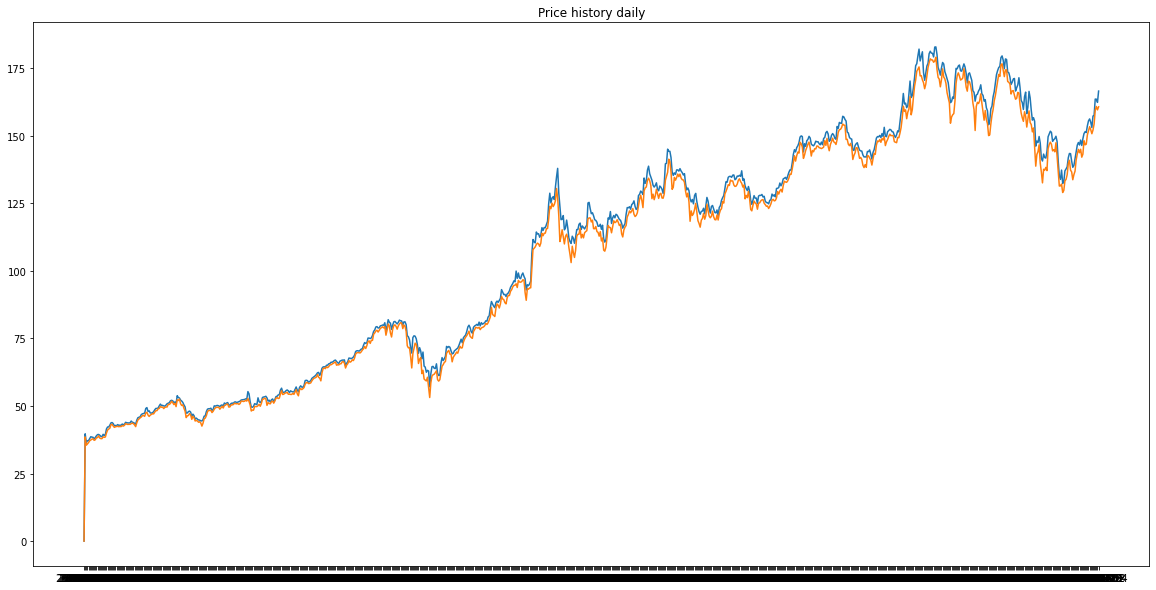

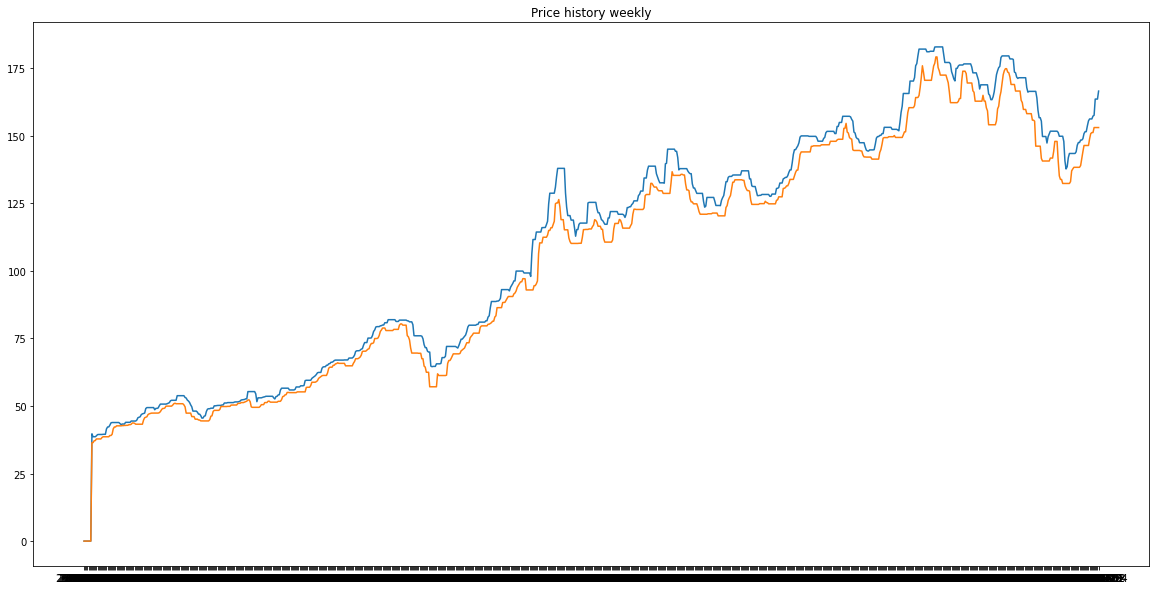

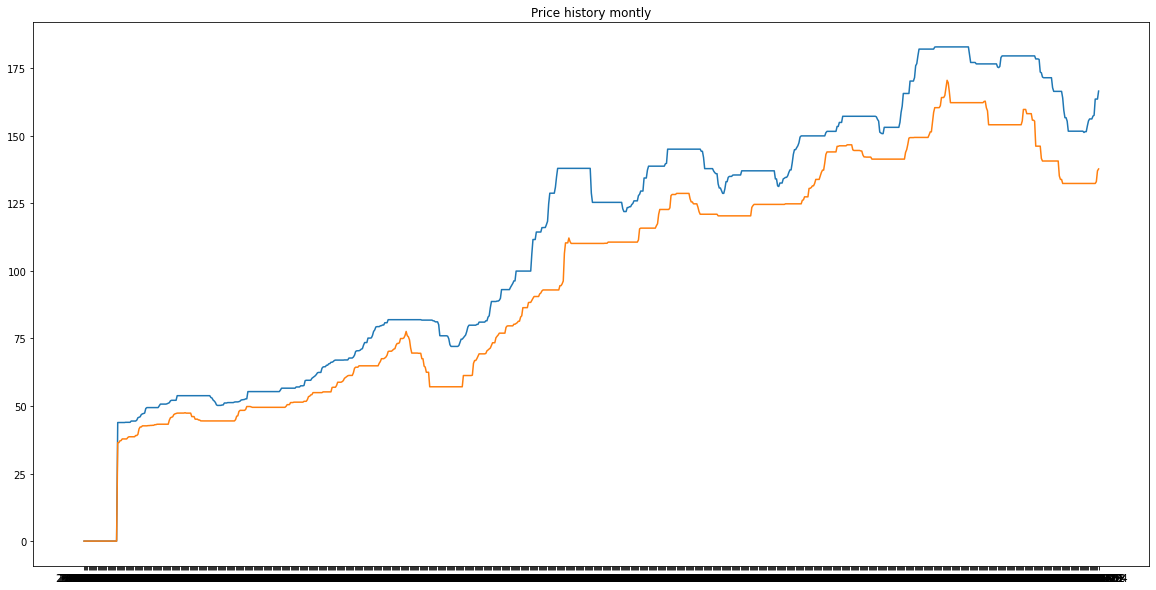

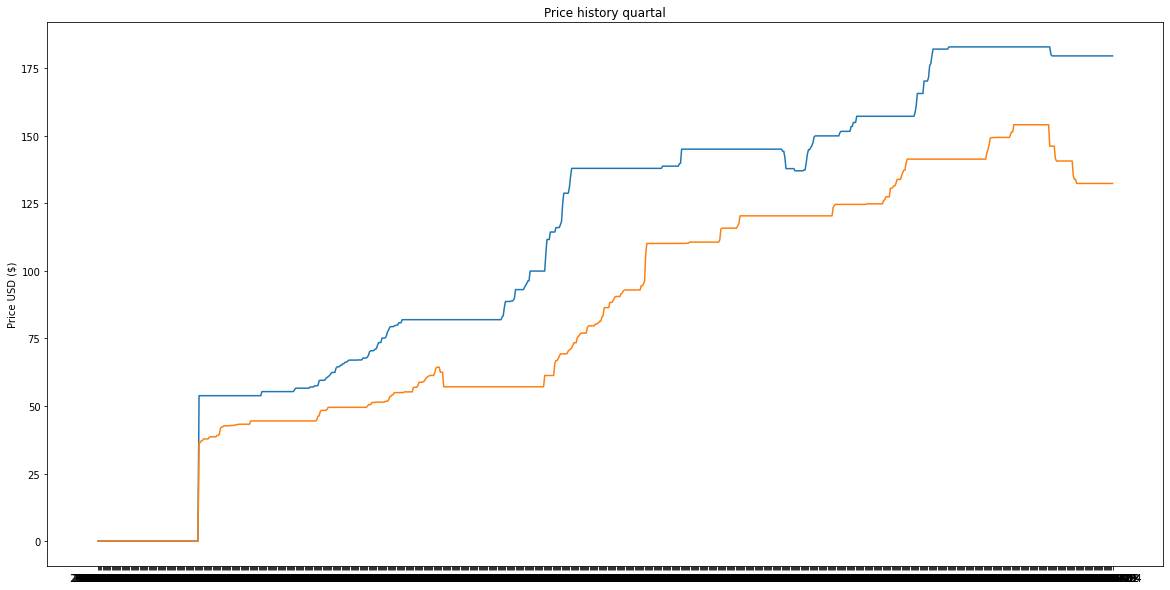

In [104]:
plt.figure(figsize=(20,10))
plt.title('Price history daily')
plt.plot(df['d_max_h'])
plt.plot(df['d_min'])
plt.figure(figsize=(20,10))
plt.title('Price history weekly')
plt.plot(df['w_max_h'])
plt.plot(df['w_min'])
plt.figure(figsize=(20,10))
plt.title('Price history montly')
plt.plot(df['m_max_h'])
plt.plot(df['m_min'])
plt.figure(figsize=(20,10))
plt.title('Price history quartal')
plt.plot(df['3m_max_h'])
plt.plot(df['3m_min'])

plt.ylabel('Price USD ($)')

plt.show()

# 1 item / month maximum

In [105]:
df['m_max_h_1'] = 0

In [106]:
m = []
for i in range(len(df['High'])): 
    for j in range(1, len(df['High'])):
        
        if df.index[i].split('-')[0:2] == df.index[j].split('-')[0:2]:
            m.append(df.iloc[i, 1])            
        else: 
            try:
                df.iloc[j, 12] = max(m)
            except:
                continue
            m.clear()
            
            

# 1 item / month minimum

In [107]:
df['m_min_1'] = 0

In [108]:
m = []
for i in range(len(df['Low'])): 
    for j in range(1, len(df['Low'])):
        
        if df.index[i].split('-')[0:2] == df.index[j].split('-')[0:2]:
            m.append(df.iloc[i, 2])            
        else: 
            try:
                df.iloc[j, 13] = min(m)
            except:
                continue
            m.clear()
            

# 1 item / 3 month maximum

In [109]:
df['3m_max_1'] = 0

In [110]:
dat = df.index[0]
for ind, i in enumerate(df.index):
    ao = i.split('-')[1]
    if ao == '04' or ao == '07' or ao == '10' or ao == '01':
        df.loc[i, '3m_max_1'] = max(list(df.loc[dat:i,'High']))
        dat = i

# 1 item / 3 month minimum

In [111]:
df['3m_min_1'] = 0

In [112]:
dat = df.index[0]
for ind, i in enumerate(df.index):
    ao = i.split('-')[1]
    if ao == '04' or ao == '07' or ao == '10' or ao == '01':
        df.loc[i, '3m_min_1'] = min(list(df.loc[dat:i,'Low']))
        dat = i

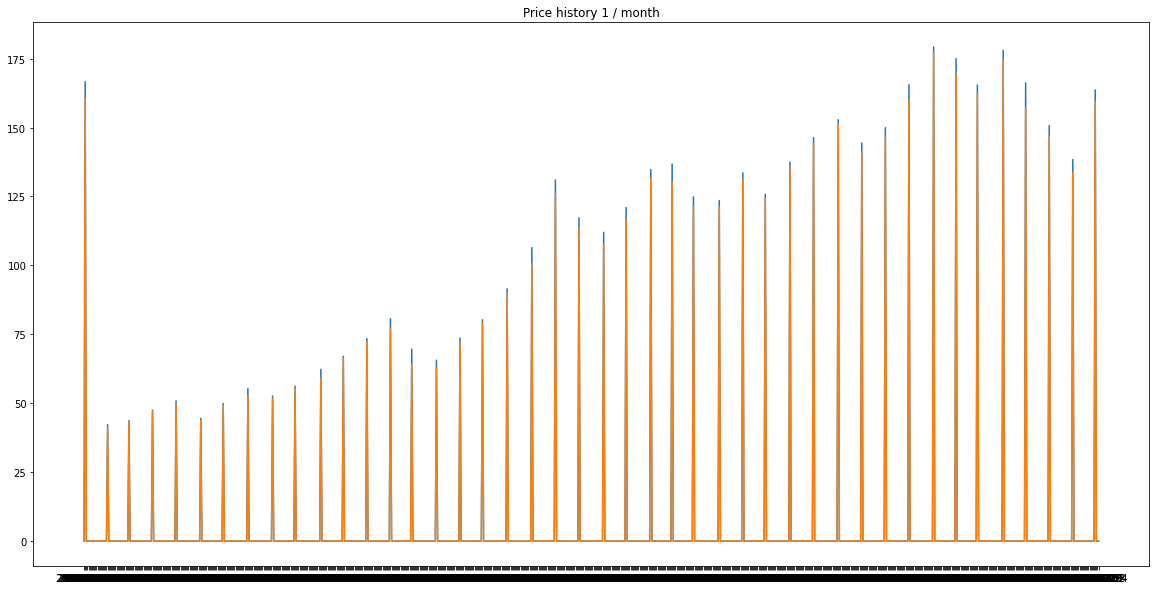

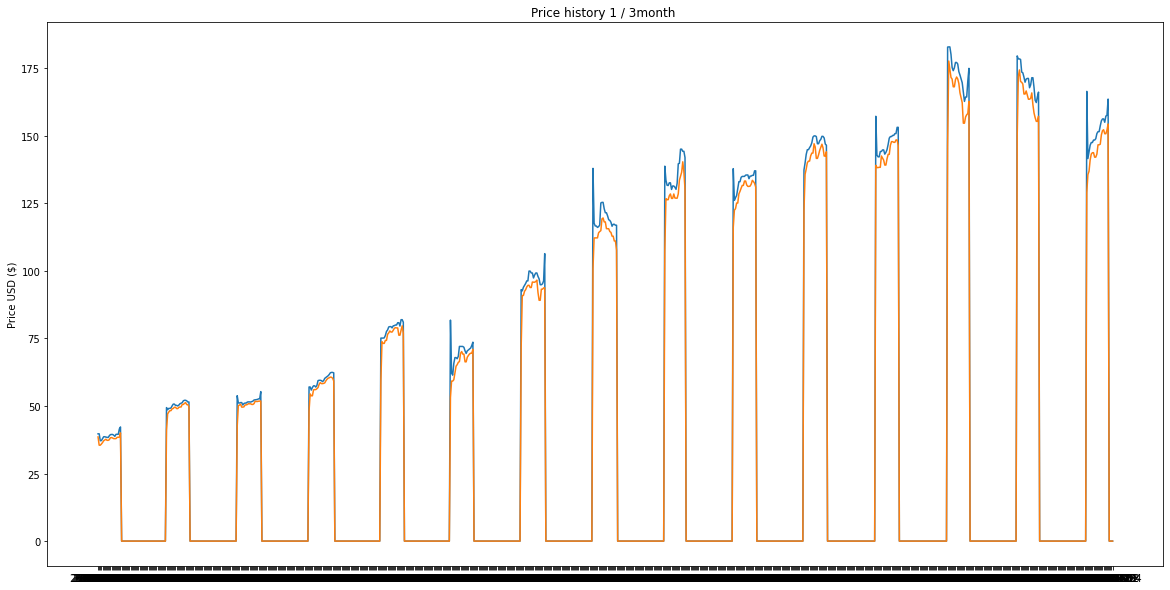

In [113]:
plt.figure(figsize=(20,10))
plt.title('Price history 1 / month')
plt.plot(df['m_max_h_1'])
plt.plot(df['m_min_1'])
plt.figure(figsize=(20,10))
plt.title('Price history 1 / 3month ')
plt.plot(df['3m_max_1'])
plt.plot(df['3m_min_1'])

plt.ylabel('Price USD ($)')

plt.show()

# Egy kis +

Ez egy deep learning model, mely elorejelzeseket keszit a kovetkezo napi arfolyamrol.

In [114]:
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.data.experimental import AUTOTUNE as AUTO

In [115]:
data = df.filter(['Close'])

In [116]:
window = 100

In [117]:
data.head()

,Close
Date,
2019-01-02,39.480000
2019-01-03,35.547501
2019-01-04,37.064999
2019-01-07,36.982498
2019-01-08,37.687500


In [118]:
dataset = data.values

In [119]:
training_data_len = math.ceil(len(dataset)*0.9)

In [120]:
training_data_len

815

In [121]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[0.02684987],
       [0.        ],
       [0.010361  ],
       [0.00979771],
       [0.01461124],
       [0.01898095],
       [0.01981736],
       [0.01723989],
       [0.01333105],
       [0.01857131]])

In [122]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i,0])

In [123]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [124]:
x_train.shape

(715, 100)

In [125]:
x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], 1))

In [126]:
lenght = x_train.shape[0]

In [127]:
def create_model():
    return Sequential(
    [LSTM(50, return_sequences=True, input_shape= (None, 1)),
    LSTM(50, return_sequences=False),
    Dense(100),
    Dense(50),
    Dense(1)])

In [128]:
model = create_model()
model.compile(optimizer='adamax', loss='mean_squared_error')

In [129]:
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
715/715 [==============================] - 36s 45ms/step - loss: 0.0033
Epoch 2/50
715/715 [==============================] - 32s 45ms/step - loss: 0.0016
Epoch 3/50
715/715 [==============================] - 31s 44ms/step - loss: 0.0014
Epoch 4/50
715/715 [==============================] - 31s 44ms/step - loss: 0.0011
Epoch 5/50
715/715 [==============================] - 32s 45ms/step - loss: 0.0011
Epoch 6/50
715/715 [==============================] - 31s 44ms/step - loss: 0.0010
Epoch 7/50
715/715 [==============================] - 31s 44ms/step - loss: 8.6604e-04
Epoch 8/50
715/715 [==============================] - 31s 44ms/step - loss: 8.1005e-04
Epoch 9/50
715/715 [==============================] - 32s 45ms/step - loss: 7.3287e-04
Epoch 10/50
715/715 [==============================] - 31s 44ms/step - loss: 6.6944e-04
Epoch 11/50
715/715 [==============================] - 32s 45ms/step - loss: 5.8820e-04
Epoch 12/50
715/715 [==============================] - 32s 44ms/s

In [130]:
test_data = scaled_data[training_data_len-window: , :]
x_test = []
y_test = []

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, 0])
    y_test.append(test_data[i,0])

In [131]:
print(len(x_test), len(y_test))

90 90


In [132]:
x_test = np.array(x_test)

In [133]:
x_test

array([[0.78158237, 0.79161907, 0.78800041, ..., 0.91943338, 0.94578825,
        0.95022621],
       [0.79161907, 0.78800041, 0.79018522, ..., 0.94578825, 0.95022621,
        0.9562346 ],
       [0.78800041, 0.79018522, 0.78444998, ..., 0.95022621, 0.9562346 ,
        0.97917564],
       ...,
       [0.86986431, 0.8396177 , 0.81374072, ..., 0.83162932, 0.86686011,
        0.86003243],
       [0.8396177 , 0.81374072, 0.78567892, ..., 0.86686011, 0.86003243,
        0.8497909 ],
       [0.81374072, 0.78567892, 0.81619868, ..., 0.86003243, 0.8497909 ,
        0.89157641]])

In [134]:
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], 1))

In [135]:
pred = model.predict(x_test)

In [136]:
pred = scaler.inverse_transform(pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


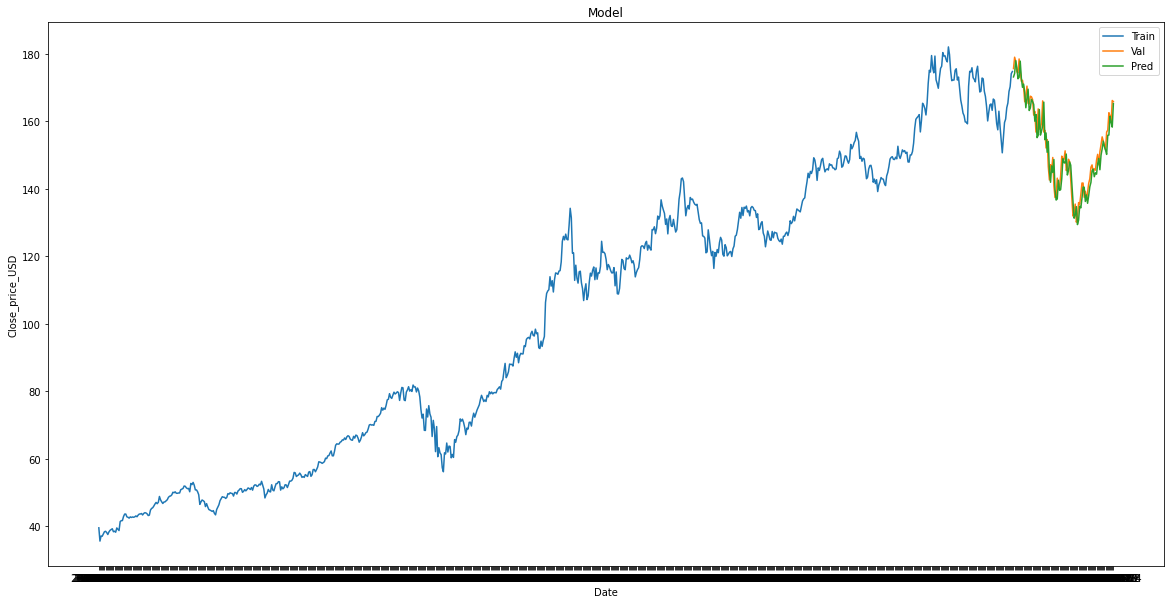

In [137]:
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = pred

plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close_price_USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


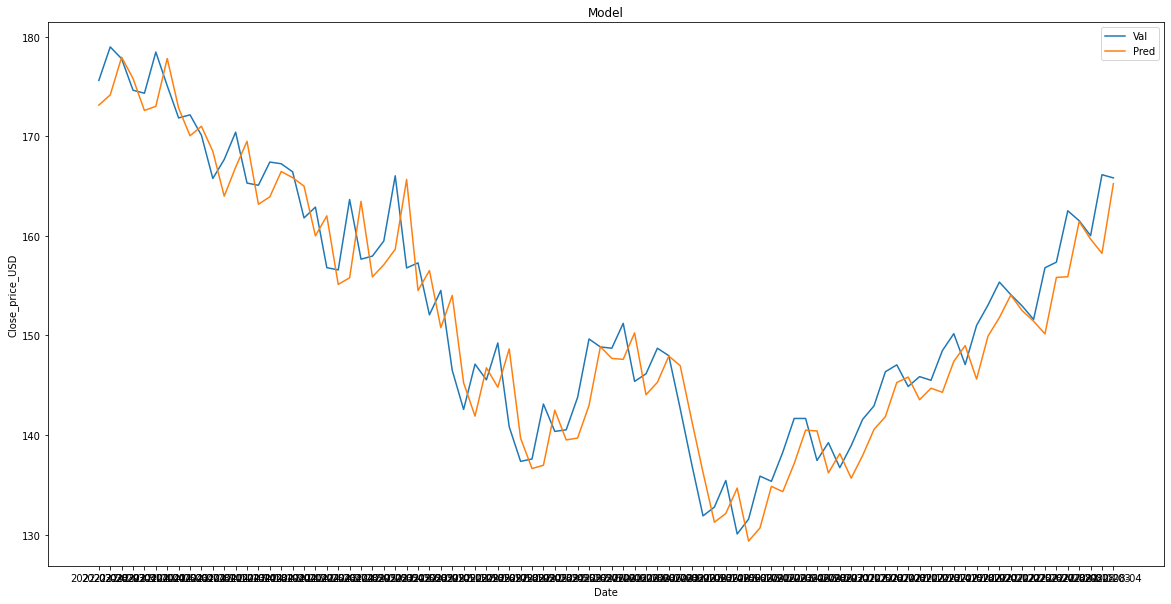

In [138]:
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = pred

plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close_price_USD')
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val','Pred'])
plt.show()